# Hybrid algorithm. Parameter investigation. Evaluation

Base settings: <br/>
1. #of items total = 1000
2. baseround_items = 20
3. LR = 10
4. machine_selection_confidence = 0.95
5. mahine_machine_tests = 50
5. items_num = 5
6. J = 3
7. Proportion "IN" items = 0.3
8. #of filters = 4
9. thrsh for "OUT" = 0.99
10. corr values in [0., 0.2, 0.3, 0.5, 0.7, 0.9]
11. machine acuracies is in 0.5-0.95
12. crowd cost = 1 per filter
12. expert cost = 20 per paper
13. results are averaged by 50 repetitions


In [195]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from operator import truediv

In [196]:
# ![alt text](imagename.png "Title")

In [197]:
title_size = 27
axes_size = 24
legend_size = 22
marker_size= 8
line_width = 3
label_size = 16
err_line_width = 1
caps_size=2
fig_size = (10, 9)

In [198]:
def plot_chart(data, title, y_limit=None):
    fig, ax = plt.subplots(figsize=fig_size)
    colors = ['darkorange', 'darkorange', 'black', 'black', 'blue', 'blue']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['X', 'o', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['algorithm'] == alg)]['loss_mean'].values
        x = data.loc[(data['algorithm'] == alg)]['price_mean'].values
        err_y = data.loc[(data['algorithm'] == alg)]['loss_std'].values
        plt.plot(x, y, label=alg, marker=marker, linewidth=line_width, markersize=marker_size)
        plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=title_size, fontweight='bold')
    plt.xlabel('Price ratio', size=axes_size)
    plt.ylabel('Loss', size=axes_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=label_size)
    plt.grid()
    if y_limit:
        plt.ylim(y_limit)
#     fig.savefig('fig1a_base_settings.png', format='png', dpi=500)



def plot_chart_recall(data, title, y_limit=None):
    fig, ax = plt.subplots(figsize=fig_size)
    colors = ['darkorange', 'darkorange', 'black', 'black', 'blue', 'blue']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['X', 'o', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['algorithm'] == alg)]['recall'].values
        x = data.loc[(data['algorithm'] == alg)]['price_mean'].values
        err_y = data.loc[(data['algorithm'] == alg)]['recall_std'].values
        plt.plot(x, y, label=alg, marker=marker, linewidth=line_width, markersize=marker_size)
        plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=title_size, fontweight='bold')
    plt.xlabel('Price ratio', size=axes_size)
    plt.ylabel('Recall', size=axes_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=label_size)
    plt.grid()
    if y_limit:
        plt.ylim(y_limit)
#     fig.savefig('fig1b_base_settings.png', format='png', dpi=500)

# 1. Chart: Base settings

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  """


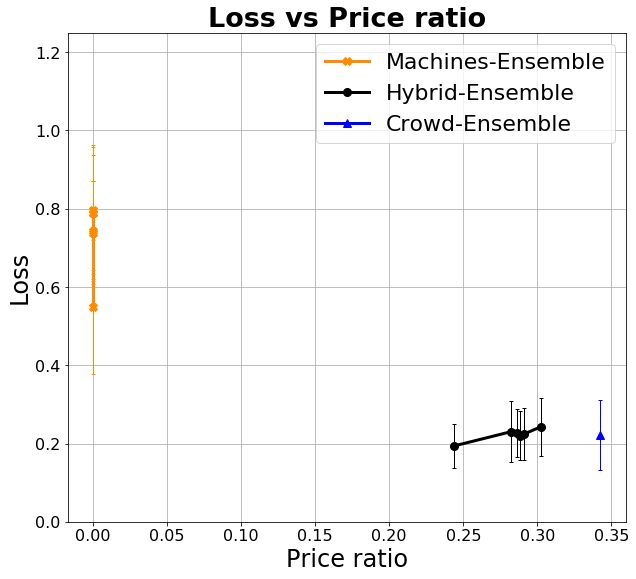

In [199]:
data = pd.read_csv('../output_data/new/fig1_base_settings.csv')
data['price_mean'] /= 20
data['price_std'] /= 20
title = 'Loss vs Price ratio'

plot_chart(data, title, (0.,1.25))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


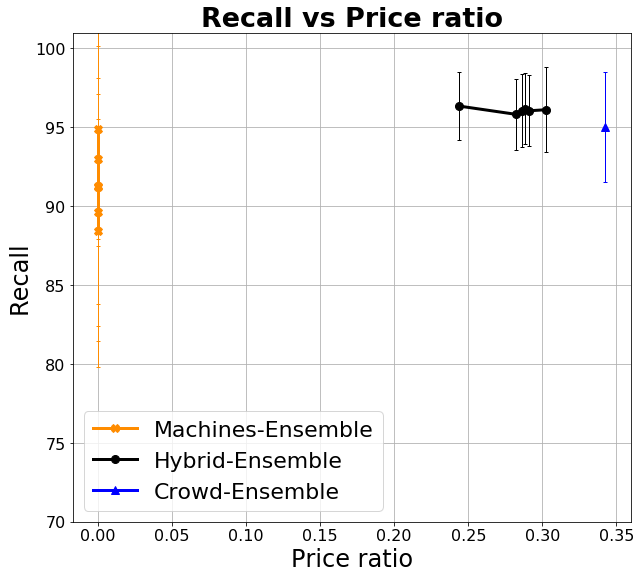

In [200]:
data = pd.read_csv('../output_data/new/fig1_base_settings.csv')

data['price_mean'] /= 20
data['price_std'] /= 20
title = 'Recall vs Price ratio'

plot_chart_recall(data, title, (70, 101))

# 3. Chart: vary machine-selection-confidence

machine_selec_conf in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

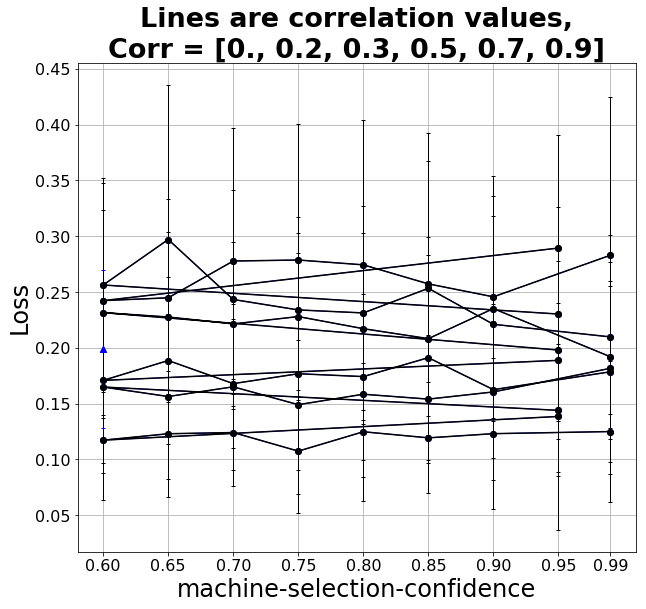

In [201]:
data = pd.read_csv('../output_data/fig1_select_conf.csv')

fig, ax = plt.subplots(figsize=fig_size)

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_mean'].values[0]
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_std'].values[0]
plt.plot(0.6, y_srun, label='Crowd-Ensemble', marker='^', color='blue')
plt.errorbar(0.6, y_srun, yerr=err_srun, marker='^', elinewidth=err_line_width, color='blue', capsize=caps_size)

x = data['select_conf'].unique()
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b', linewidth=err_line_width)
    plt.errorbar(x, y, yerr=err, marker='o', elinewidth=err_line_width, color='black', capsize=caps_size)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=title_size, fontweight='bold')
plt.xlabel('machine-selection-confidence', size=axes_size)
plt.ylabel('Loss', size=axes_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
# plt.legend(fontsize = legend_size)
plt.xticks(x)
plt.grid()
#     fig.savefig('figX.png', format='png', dpi=500)

# 4. Chart: vary expert cost

expert_vote_cost in [10,  20, 30, 40, 50, 70, 100]

# 4.1 Chart: vary expert cost (Loss vs Price Ratio)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


10
20
30
40
50
70
100
10
20
30
40
50
70
100


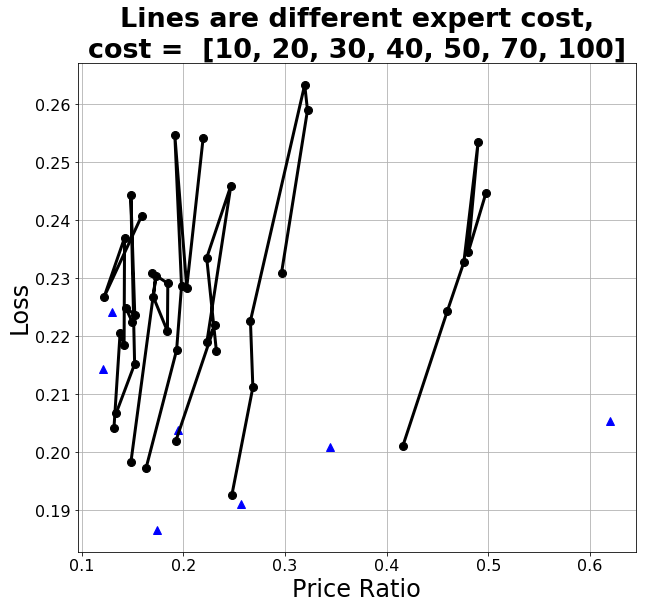

In [202]:
data = pd.read_csv('../output_data/new/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=fig_size)
# colors = ['green', 'green', 'red', 'red']
colors = ['blue', 'black']
algos = ['Crowd-Ensemble', 'Hybrid-Ensemble']
ax.set_color_cycle(colors)

markers = ['^', 'o']
def plot_alg(data, alg, marker, c, col):
    print(c)
    y = data.loc[(data['algorithm'] == alg) & (data['expert_cost'] == c)]['loss_mean'].values
    x = data.loc[(data['algorithm'] == alg) & (data['expert_cost'] == c)]['price_mean'].values
    x /= c
    err = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == 50) & (data['expert_cost'] == c)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker, color =col, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1, capsize=2)

expert_cost = data['expert_cost'].unique()
# expert_vote_cost = [10, 30]
for alg, marker, col in zip(algos, markers, colors):
    for c in expert_cost: 
        plot_alg(data, alg, marker, c, col)

plt.title('Lines are different expert cost,\ncost =  [10, 20, 30, 40, 50, 70, 100]', size=title_size, fontweight='bold')
plt.xlabel('Price Ratio', size=axes_size)
plt.ylabel('Loss', size=axes_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
# plt.ylim((0., 0.5))
# plt.legend(fontsize = 25)
plt.grid()
# fig.savefig('expert_cost.png', format='png', dpi=500)

## 4.2 Chart: vary expert cost (Recall vs Price Ratio)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


10
20
30
40
50
70
100
10
20
30
40
50
70
100


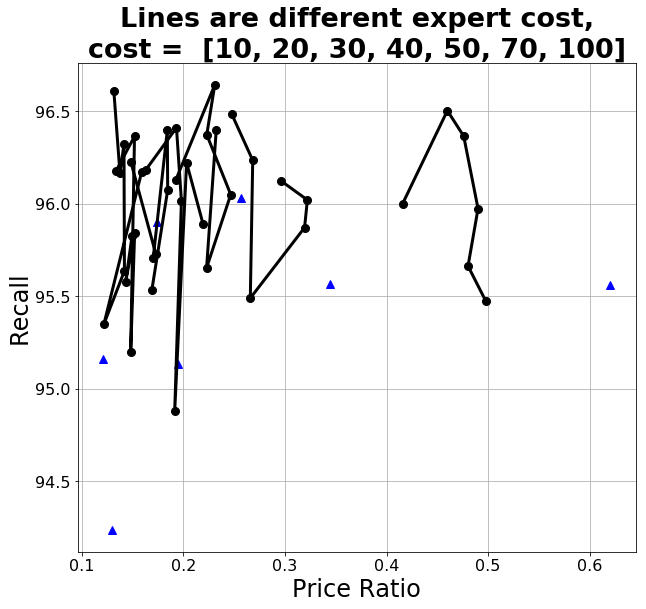

In [203]:
data = pd.read_csv('../output_data/new/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=fig_size)
# colors = ['green', 'green', 'red', 'red']
colors = ['blue', 'black']
algos = ['Crowd-Ensemble', 'Hybrid-Ensemble']
ax.set_color_cycle(colors)

markers = ['^', 'o']
def plot_alg(data, alg, marker, c, col):
    print(c)
    y = data.loc[(data['algorithm'] == alg) & (data['expert_cost'] == c)]['recall'].values
    x = data.loc[(data['algorithm'] == alg) & (data['expert_cost'] == c)]['price_mean'].values
    x /= c
    err = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == 50) & (data['expert_cost'] == c)]['recall_std'].values
    plt.plot(x, y, label=alg, marker=marker, color =col, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1, capsize=2)

expert_cost = data['expert_cost'].unique()
# expert_vote_cost = [10, 30]
for alg, marker, col in zip(algos, markers, colors):
    for c in expert_cost: 
        plot_alg(data, alg, marker, c, col)

plt.title('Lines are different expert cost,\ncost =  [10, 20, 30, 40, 50, 70, 100]', size=title_size, fontweight='bold')
plt.xlabel('Price Ratio', size=axes_size)
plt.ylabel('Recall', size=axes_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
# plt.ylim((0., 0.5))
# plt.legend(fontsize = 25)
plt.grid()
# fig.savefig('expert_cost.png', format='png', dpi=500)

# 5. Chart : Price Ratio vs Expert cost

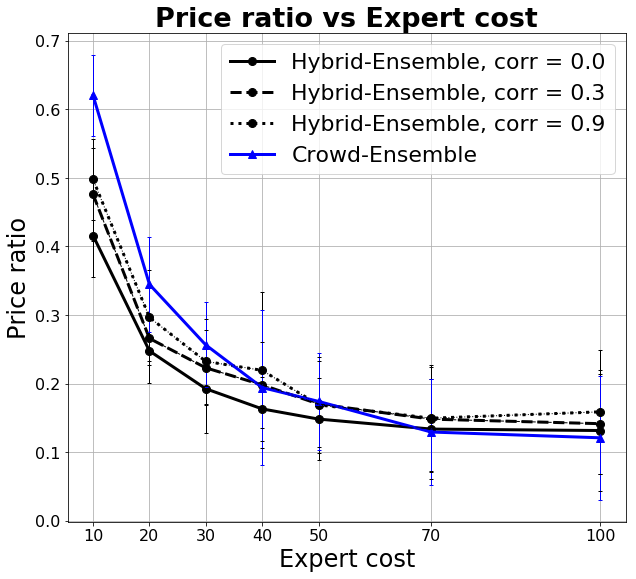

In [204]:
from operator import truediv
data = pd.read_csv('../output_data/new/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=fig_size)

expert_cost = data['expert_cost'].unique()
x = expert_cost

corr_list = data['corr'].unique()
# for corr in corr_list:
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 20) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 20) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    err = list(map(truediv, err, x))
    plt.errorbar(x, y, yerr=err, linewidth=err_line_width, color='black', linestyle=s, capsize=caps_size)
 
for corr in [0.]:
    y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
    err2 = list(map(truediv, err2, x))
    plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Price ratio vs Expert cost', size=title_size, fontweight='bold')
plt.ylabel('Price ratio', size=axes_size)
plt.xlabel('Expert cost', size=axes_size)
# plt.ylim((0., 0.5))
plt.xticks(x)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.legend(fontsize = legend_size)
plt.grid()
# fig.savefig('fig1c_price_expert_cost.png', forxmat='png', dpi=500)

# 6. Chart: Test different theta (proportion of relevant items)

Theta in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

## 6.1 Chart: Recall vs Proportion of positive item

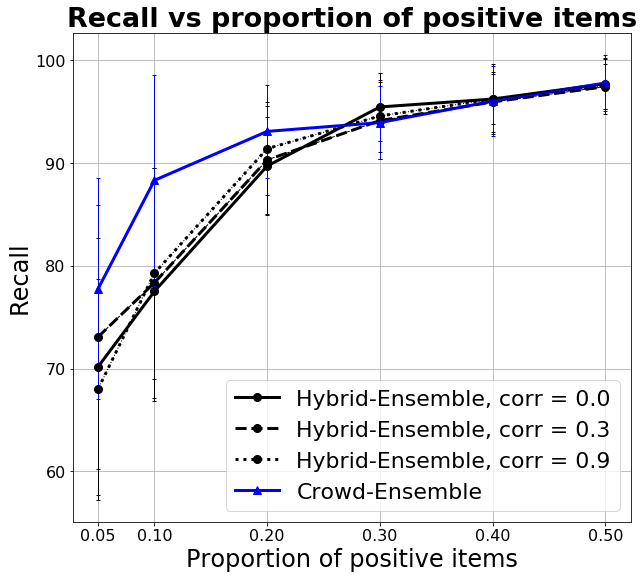

In [205]:
data = pd.read_csv('../output_data/new/fig1_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Recall vs proportion of positive items', size=title_size, fontweight='bold')
plt.ylabel('Recall', size=axes_size)
plt.xlabel('Proportion of positive items', size=axes_size)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('fig1_d_recall_theta.png', format='png', dpi=500)

## 6.3 Chart: Loss vs Proportion of positive item

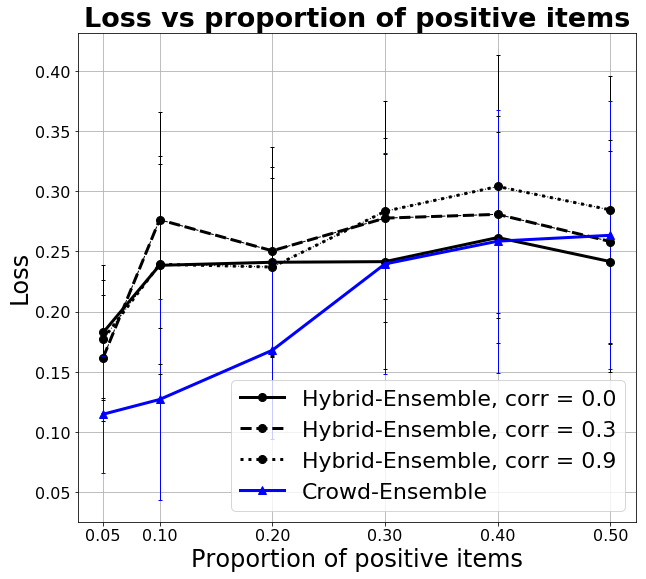

In [206]:
data = pd.read_csv('../output_data/new/fig1_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['loss_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['loss_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['loss_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Loss vs proportion of positive items', size=title_size, fontweight='bold')
plt.ylabel('Loss', size=axes_size)
plt.xlabel('Proportion of positive items', size=axes_size)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

## 6.3 Chart: Price Ration vs Proportion of positive item

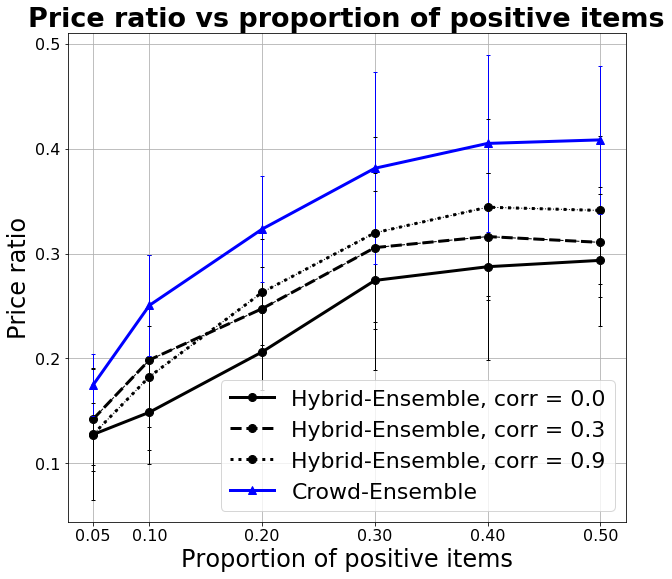

In [207]:
data = pd.read_csv('../output_data/new/fig1_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Price ratio vs proportion of positive items', size=title_size, fontweight='bold')
plt.ylabel('Price ratio', size=axes_size)
plt.xlabel('Proportion of positive items', size=axes_size)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('fig1_e_price_theta.png', format='png', dpi=500)

# 7. Chart: Test different filters number

## 7.1 Chart: Recall vs Filters number

filters number = [1, 2, 3, 4, 5]

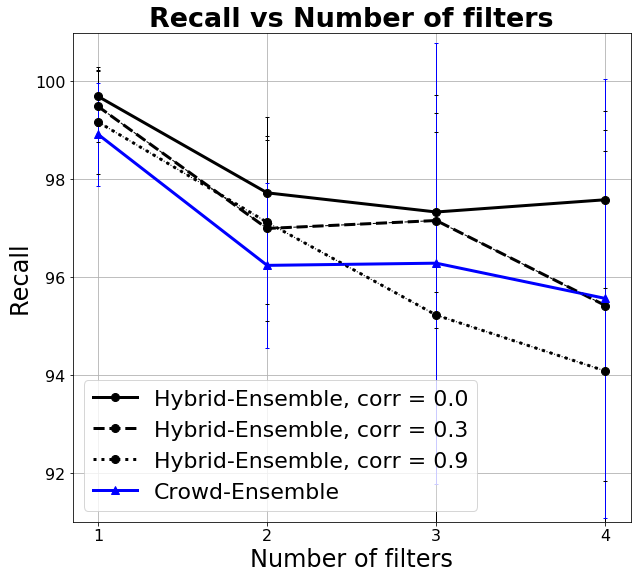

In [208]:
data = pd.read_csv('../output_data/fig5_filters_num.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['filters_num'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Recall vs Number of filters', size=title_size, fontweight='bold')
plt.ylabel('Recall', size=axes_size)
plt.xlabel('Number of filters', size=axes_size)
plt.ylim((91., 101))
plt.legend(fontsize = legend_size)
plt.xticks(x)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('recall_filters_num.png', format='png', dpi=500)

## 7.2 Chart: Price Ratio vs Filters number

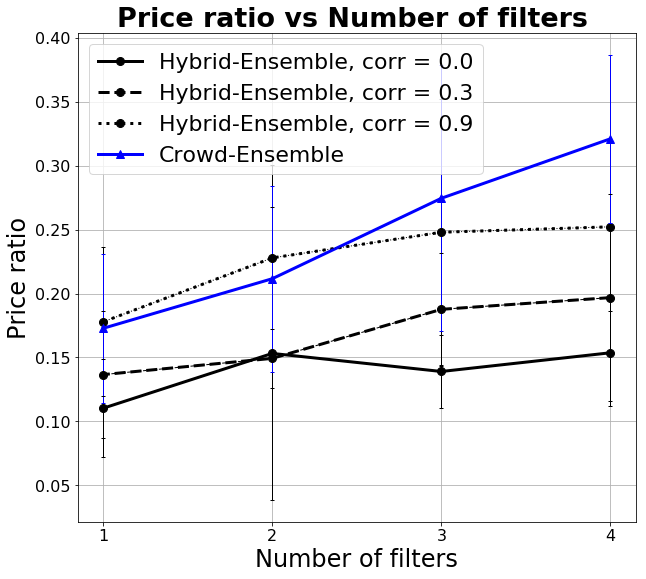

In [209]:
data = pd.read_csv('../output_data/fig5_filters_num.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['filters_num'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Price ratio vs Number of filters ', size=title_size, fontweight='bold')
plt.ylabel('Price ratio', size=axes_size)
plt.xlabel('Number of filters', size=axes_size)
plt.xticks(x)
# plt.ylim((91., 101))
plt.legend(fontsize = legend_size)
plt.xticks(x)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

## 7.3 Chart: Recall vs Price Ratio, dots are correlation = [0., 0.2, 0.3, 0.5, 0.7, 0.9]

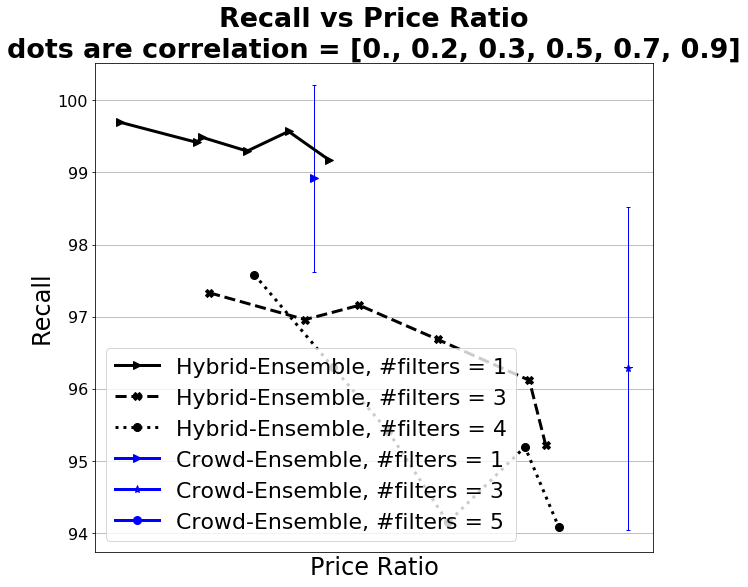

In [210]:
data = pd.read_csv('../output_data/fig5_filters_num.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)


for f, s, m in zip([1, 3, 4], ['-', '--', ':'], ['>', 'X', 'o']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['recall'].values
    x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, #filters = {}'.format(f), marker=m, color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err_y, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
for f, m in zip([1, 3, 5], ['>', '*', 'o']):
    y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['recall'].values
    x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['recall_std'].values
    plt.plot(x, y, label='Crowd-Ensemble, #filters = {}'.format(f), marker=m, color='blue', linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err_y, color='blue', linestyle=s, capsize=caps_size, linewidth=err_line_width)



plt.title('Recall vs Price Ratio\ndots are correlation = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=title_size, fontweight='bold')
plt.ylabel('Recall', size=axes_size)
plt.xlabel('Price Ratio', size=axes_size)
plt.legend(fontsize = legend_size)
plt.xticks(x)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

## 7.4 Chart: Recall vs Price Ratio, dots are #filters = [1, 2, 3, 4, 5]

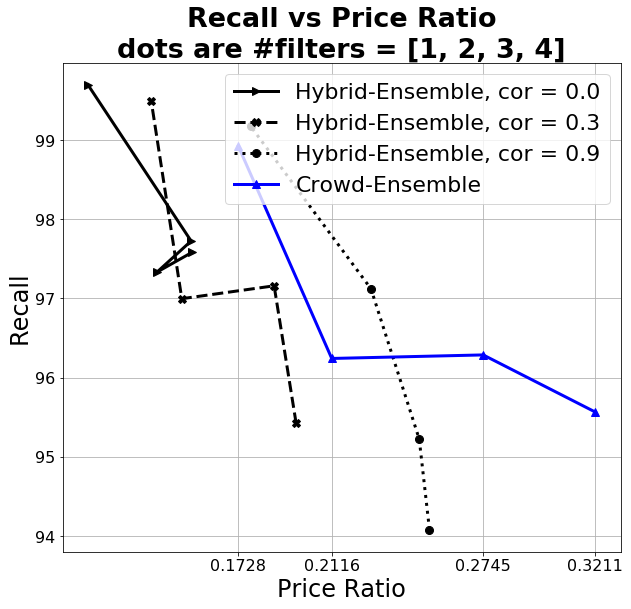

In [211]:
data = pd.read_csv('../output_data/fig5_filters_num.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)


for c, s, m in zip([0., 0.3, 0.9], ['-', '--', ':'], ['>', 'X', 'o']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall'].values
    x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, cor = {}'.format(c), marker=m, color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err_y, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['recall'].values
x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['price_mean'].values
err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble'.format(f), marker='^', color='blue', linewidth=line_width, markersize=marker_size)
# plt.errorbar(x, y, yerr=err_y, color='blue', linestyle=s, capsize=caps_size, linewidth=err_line_width)



plt.title('Recall vs Price Ratio\ndots are #filters = [1, 2, 3, 4]', size=title_size, fontweight='bold')
plt.ylabel('Recall', size=axes_size)
plt.xlabel('Price Ratio', size=axes_size)
# plt.ylim((91., 101))
plt.legend(fontsize = legend_size)
plt.xticks(x)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

 # 9. Chart: Different paramters of filters

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


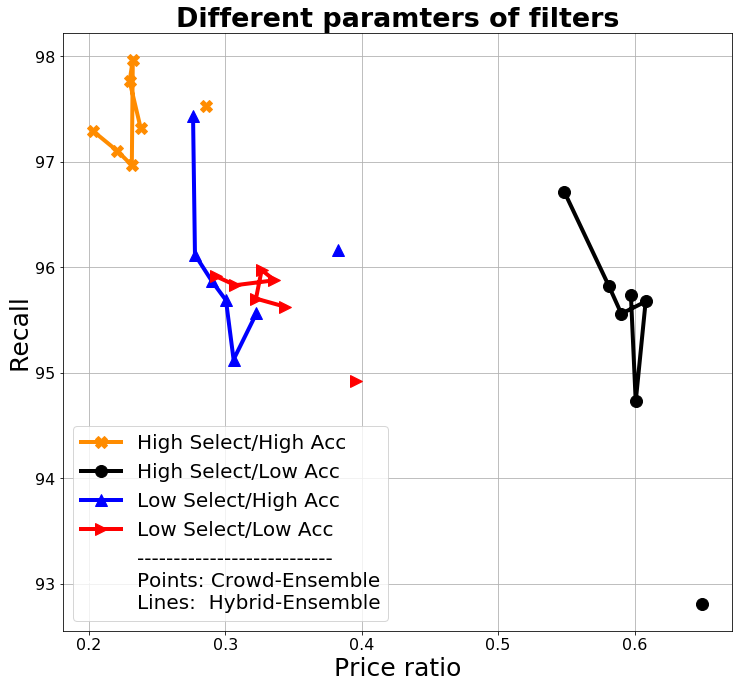

In [212]:
data = pd.read_csv('../output_data/new/fig1_vary_acc_select.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10+2, 9+2))
colors = ['darkorange', 'darkorange', 'black', 'black', 'blue', 'blue', 'red', 'red']
ax.set_color_cycle(colors)

markers = ['X', 'o', '^', '>']

def plot_alg(data, setting, marker, algo):
    y = data.loc[(data['algorithm'] == algo) & (data['label'] == setting)]['recall'].values
    x = data.loc[(data['algorithm'] == algo) & (data['label'] == setting)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == algo) & (data['label'] == setting)]['recall_std'].values
    if algo == 'Crowd-Ensemble':
        plt.plot(x, y, marker=marker, linewidth=line_width, markersize=marker_size+4)
    else:
        plt.plot(x, y, label=setting, marker=marker, linewidth=line_width+1, markersize=marker_size+4)
#     plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

algos = ['Hybrid-Ensemble', 'Crowd-Ensemble'] 
setting_lists = ['High Select/High Acc', 'High Select/Low Acc', 'Low Select/High Acc', 'Low Select/Low Acc']
for setting, marker in zip(setting_lists, markers):
    for algo in algos:
        plot_alg(data, setting, marker, algo)

plt.plot([0.5], [97], label='---------------------------\nPoints: Crowd-Ensemble\nLines:  Hybrid-Ensemble', color='w')

plt.title("Different paramters of filters", size=title_size, fontweight='bold')
plt.xlabel('Price ratio', size=axes_size+1)
plt.ylabel('Recall', size=axes_size+1)
plt.legend(fontsize = legend_size-2)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()

# fig.savefig('vary_filter_params.png', format='png', dpi=500)

# 10. Stacking

## 10.1 Ensemble algos, #tests=100

## 10.2 Ensemble algos: accuracy of machines is in [0.5, 0.95] 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  # Remove the CWD from sys.path while we load stuff.


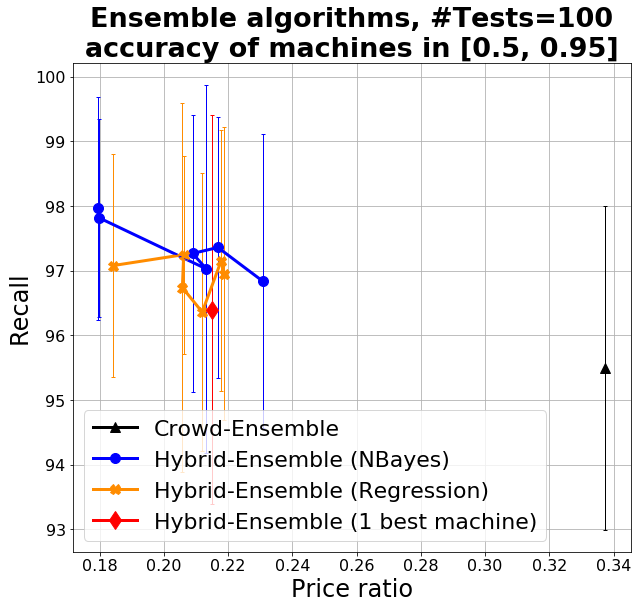

In [213]:
data = pd.read_csv('../output_data/new/fig3_100tests_95upper_acc.csv')
data['price_mean'] /= 20
data['price_std'] /= 20


fig, ax = plt.subplots(figsize=fig_size)
# colors = ['black', 'black', 'blue', 'blue', 'red', 'red']
colors = ['black', 'black','blue', 'blue', 'darkorange', 'darkorange', 'red', 'red']
algos = ['Hybrid-Ensemble (NBayes)', 'Hybrid-Ensemble (Regression)']
ax.set_color_cycle(colors)

markers = ['o', 'X']
num_tests = 100

y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall'].values
x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['price_mean'].values
err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', linewidth=line_width, markersize=marker_size+2)
plt.errorbar(x, y, yerr=err_y, marker='^', linewidth=err_line_width, capsize=caps_size)
    
def plot_alg(data, alg, marker):
    y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests)]['recall'].values
    x = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests)]['recall_std'].values
    plt.plot(x, y, label=alg, marker=marker, linewidth=line_width, markersize=marker_size+2)
    plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

for alg, marker in zip(algos, markers):
    plot_alg(data, alg, marker)

# best classifier acc [0.5, 0.8]
y = [96.4]
x = [4.3/20]
err_y = [3]
plt.plot(x, y, label='Hybrid-Ensemble (1 best machine)', marker='d', linewidth=line_width, markersize=marker_size+5)
plt.errorbar(x, y, yerr=err_y, marker='d', linewidth=err_line_width, capsize=caps_size)


plt.title('Ensemble algorithms, #Tests={}\naccuracy of machines in [0.5, 0.95]'.format(num_tests), size=title_size, fontweight='bold')
plt.xlabel('Price ratio', size=axes_size)
plt.ylabel('Recall', size=axes_size)
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()

# fig.savefig('ensemble_algos_acc05_95_tests100.png', format='png', dpi=500)

## 10.2.2 Ensemble algos: accuracy of machines is in [0.5, 0.75] 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  # Remove the CWD from sys.path while we load stuff.


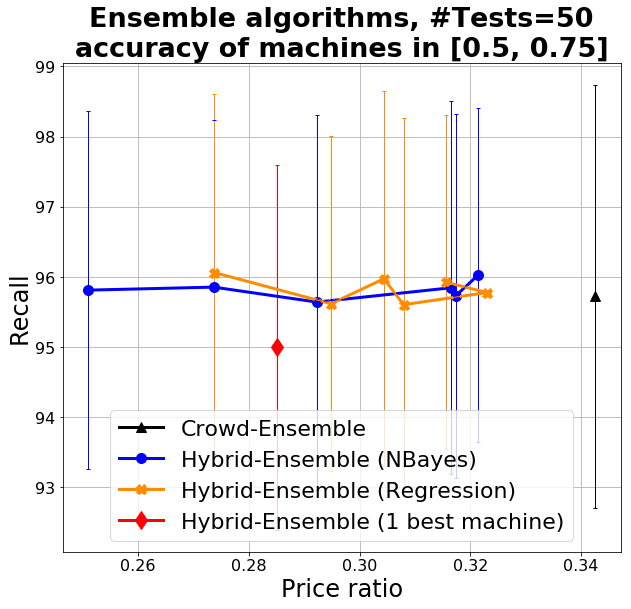

In [221]:
data = pd.read_csv('../output_data/new/fig3_50tests_75upper_acc.csv')
data['price_mean'] /= 20
data['price_std'] /= 20


fig, ax = plt.subplots(figsize=fig_size)
# colors = ['black', 'black', 'blue', 'blue', 'red', 'red']
colors = ['black', 'black','blue', 'blue', 'darkorange', 'darkorange', 'red', 'red']
algos = ['Hybrid-Ensemble (NBayes)', 'Hybrid-Ensemble (Regression)']
ax.set_color_cycle(colors)

markers = ['o', 'X']
num_tests = 50

y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall'].values
x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['price_mean'].values
err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', linewidth=line_width, markersize=marker_size+2)
plt.errorbar(x, y, yerr=err_y, marker='^', linewidth=err_line_width, capsize=caps_size)
    
def plot_alg(data, alg, marker):
    y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests)]['recall'].values
    x = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests)]['recall_std'].values
    plt.plot(x, y, label=alg, marker=marker, linewidth=line_width, markersize=marker_size+2)
    plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

for alg, marker in zip(algos, markers):
    plot_alg(data, alg, marker)

# best classifier acc [0.5, 0.75]
y = [95.]
x = [5.7/20]
err_y = [2.6]
plt.plot(x, y, label='Hybrid-Ensemble (1 best machine)', marker='d', linewidth=line_width, markersize=marker_size+5)
plt.errorbar(x, y, yerr=err_y, marker='d', linewidth=err_line_width, capsize=caps_size)

plt.title('Ensemble algorithms, #Tests={}\naccuracy of machines in [0.5, 0.75]'.format(num_tests), size=title_size, fontweight='bold')
plt.xlabel('Price ratio', size=axes_size)
plt.ylabel('Recall', size=axes_size)
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()

# fig.savefig('fig3c_ensemble_algo_acc05_75_50tests.png', format='png', dpi=500)

## 10.3 Ensemble algos: VARY #of tests (Price ratio vs #Tests)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  # Remove the CWD from sys.path while we load stuff.


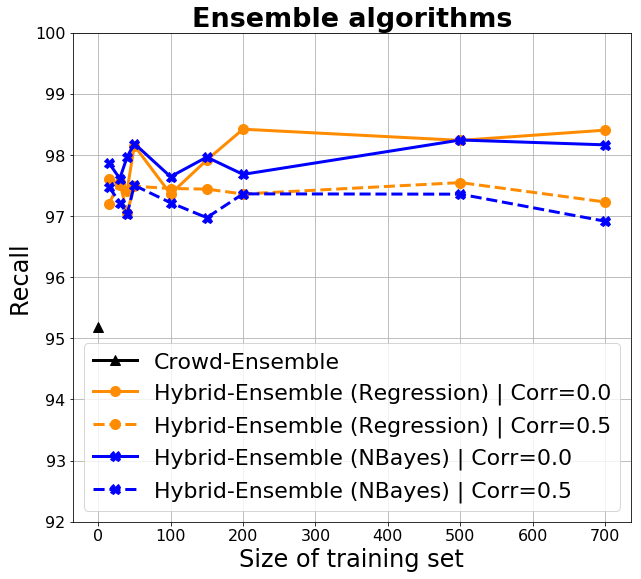

In [215]:
data = pd.read_csv('../output_data/fig3_tests_num.csv')
data['price_mean'] /= 20
data['price_std'] /= 20


fig, ax = plt.subplots(figsize=fig_size)
colors = ['black', 'darkorange', 'darkorange', 'blue', 'blue']
# colors = ['black', 'blue', 'red']
algos = ['Hybrid-Ensemble (Regression)', 'Hybrid-Ensemble (NBayes)']
ax.set_color_cycle(colors)

markers = ['o', 'X']

y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)].sort_values('machine_tests')['recall'].values
# x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['price_mean'].values
err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)].sort_values('machine_tests')['recall_std'].values
plt.plot([0], y, label='Crowd-Ensemble', marker='^', linewidth=line_width, markersize=marker_size+2)
# plt.errorbar([0], y, yerr=err_y, marker='^', linewidth=err_line_width, capsize=caps_size)

# x = np.array([30., 40.,  50., 100., 150., 200., 500., 700])**(1/2)
x = np.array([15, 30., 40.,  50., 100., 150., 200., 500., 700])
def plot_alg(data, alg, marker):
    for corr, s in zip([0.0, .5], ['-', '--']):
        y = data.loc[(data['algorithm'] == alg) & (data['corr'] == corr)].sort_values('machine_tests')['recall'].values
    #     x = data.loc[(data['algorithm'] == alg) & (data['corr'] == 0.)]['machine_tests'].apply(np.sqrt, axis=0).values
        err_y = data.loc[(data['algorithm'] == alg) & (data['corr'] == corr)].sort_values('machine_tests')['recall_std'].values
        plt.plot(x, y, label=alg+' | Corr='+str(corr), marker=marker, linewidth=line_width, markersize=marker_size+2, linestyle=s)
#         plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

for alg, marker in zip(algos, markers):
    plot_alg(data, alg, marker)
    
plt.title('Ensemble algorithms', size=title_size, fontweight='bold')
plt.xlabel('Size of training set', size=axes_size)
# plt.xticks(x)
plt.ylabel('Recall', size=axes_size)
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.ylim((92, 100))
plt.grid()

# fig.savefig('ensemble_algos_price_tests.png', format='png', dpi=500)

## 10.3 Impact of prior

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if __name__ == '__main__':


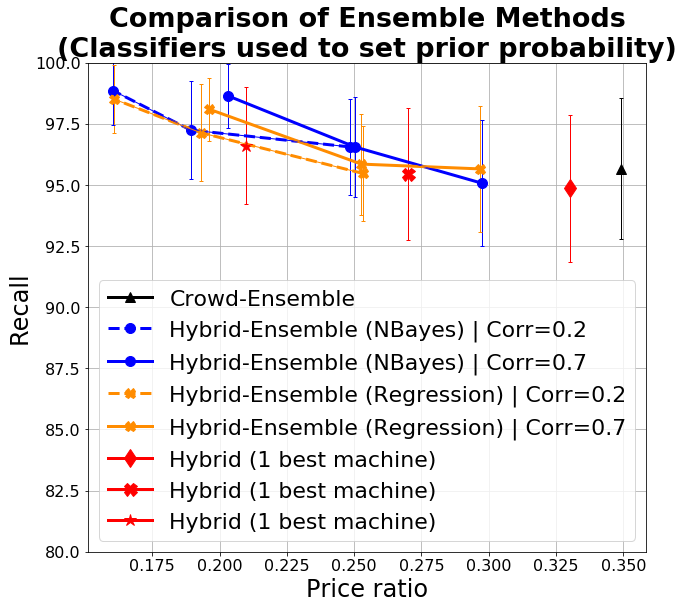

In [255]:
data = pd.read_csv('../output_data/new/fig4_hybrid.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)
colors = ['black', 'black', 'blue', 'blue',  'blue', 'blue', 'darkorange', 'darkorange', 'darkorange', 'darkorange']
# colors = ['black', 'blue', 'blue', 'darkorange', 'darkorange']
algos = ['Hybrid-Ensemble (NBayes)', 'Hybrid-Ensemble (Regression)']
ax.set_color_cycle(colors)

markers = ['o', 'X']
num_tests = 500

y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall'].values
x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['price_mean'].values
err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', linewidth=line_width, markersize=marker_size+2)
plt.errorbar(x, y, yerr=err_y, marker='^', linewidth=err_line_width, capsize=caps_size)
    
def plot_alg(data, alg, marker, corr, s):
    y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests) & (data['corr'] == corr)]['recall'].values
    x = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests) & (data['corr'] == corr)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests) & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label=alg+' | Corr='+str(corr), marker=marker, linewidth=line_width, markersize=marker_size+2, linestyle=s)
    plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)


for alg, marker in zip(algos, markers):
    for corr, s in zip([0.2, 0.7], ['--', '-']):
      plot_alg(data, alg, marker, corr, s)


# best classifier acc [0.6, 0.7]
y = [94.86]
x = [0.33]
err_y = [3]
plt.plot(x, y, label='Hybrid (1 best machine)', marker='d', linewidth=line_width, markersize=marker_size+5, color='r')
plt.errorbar(x, y, yerr=err_y, marker='d', linewidth=err_line_width, capsize=caps_size, color='r')

# best classifier acc [0.7, 0.8]
y = [95.44]
x = [0.27]
err_y = [2.7]
plt.plot(x, y, label='Hybrid (1 best machine)', marker='X', linewidth=line_width, markersize=marker_size+5, color='r')
plt.errorbar(x, y, yerr=err_y, marker='X', linewidth=err_line_width, capsize=caps_size, color='r')

# best classifier acc [0.8, 0.9]
y = [96.6]
x = [0.21]
err_y = [2.4]
plt.plot(x, y, label='Hybrid (1 best machine)', marker='*', linewidth=line_width, markersize=marker_size+5, color='r')
plt.errorbar(x, y, yerr=err_y, marker='*', linewidth=err_line_width, capsize=caps_size, color='r')

# plt.plot([0.5], [97], label='---------------------------\nRed points: Hybrid-Ensemble (1 best machine)', color='w')
# 
plt.title('Comparison of Ensemble Methods\n(Classifiers used to set prior probability)'.format(num_tests), size=title_size, fontweight='bold')
plt.xlabel('Price ratio', size=axes_size)
plt.ylabel('Recall', size=axes_size)
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.ylim((80, 100))
plt.grid()

# fig.savefig('fig2_prior_impact.png', format='png', dpi=500)

## FIG 4 machines (2 clf min)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if __name__ == '__main__':


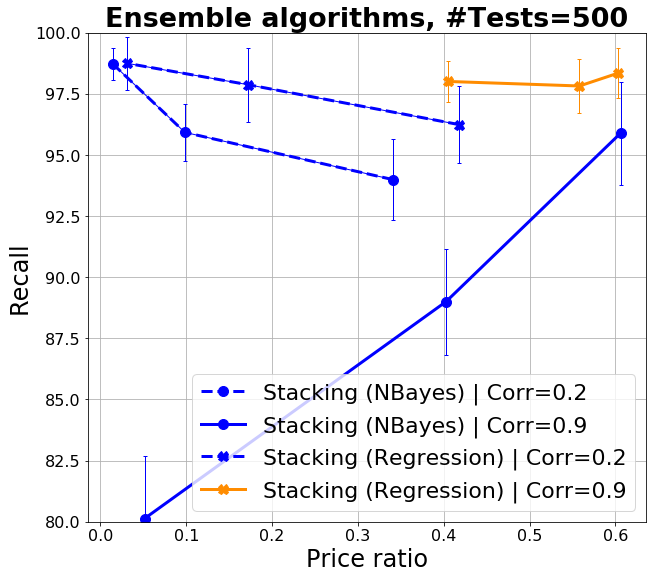

In [251]:
data = pd.read_csv('../output_data/new/fig4_machines.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)
# colors = [ 'blue', 'blue',  'blue', 'blue', 'darkorange', 'darkorange', 'darkorange', 'darkorange']
colors = [ 'blue', 'blue',  'blue', 'blue', 'blue', 'blue', 'darkorange', 'darkorange', 'darkorange', 'darkorange', 'darkorange', 'darkorange']
algos = ['Stacking (NBayes)', 'Stacking (Regression)']
ax.set_color_cycle(colors)

markers = ['o', 'X']
num_tests = 500

# y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall'].values
# x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['price_mean'].values
# err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0.)]['recall_std'].values
# plt.plot(x, y, label='Crowd-Ensemble', marker='^', linewidth=line_width, markersize=marker_size+2)
# plt.errorbar(x, y, yerr=err_y, marker='^', linewidth=err_line_width, capsize=caps_size)
    
def plot_alg(data, alg, marker, corr, s):
    y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests) & (data['corr'] == corr)]['recall'].values
    x = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests) & (data['corr'] == corr)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == num_tests) & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label=alg+' | Corr='+str(corr), marker=marker, linewidth=line_width, markersize=marker_size+2, linestyle=s)
    plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)


for alg, marker in zip(algos, markers):
    for corr, s in zip([0.2, 0.9], ['--', '-']):
      plot_alg(data, alg, marker, corr, s)


# # best classifier acc [0.6, 0.7]
# y = [94.86]
# x = [0.33]
# err_y = [3]
# plt.plot(x, y, label='Hybrid (1 best machine) | acc in [0.6, 0.7]', marker='d', linewidth=line_width, markersize=marker_size+5, color='r')
# plt.errorbar(x, y, yerr=err_y, marker='d', linewidth=err_line_width, capsize=caps_size, color='r')

# # best classifier acc [0.7, 0.8]
# y = [95.44]
# x = [0.27]
# err_y = [2.7]
# plt.plot(x, y, label='Hybrid (1 best machine) | acc in [0.7, 0.8]', marker='X', linewidth=line_width, markersize=marker_size+5, color='r')
# plt.errorbar(x, y, yerr=err_y, marker='X', linewidth=err_line_width, capsize=caps_size, color='r')

# # best classifier acc [0.8, 0.9]
# y = [96.6]
# x = [0.21]
# err_y = [2.4]
# plt.plot(x, y, label='Hybrid (1 best machine) | acc in [0.8, 0.9]', marker='*', linewidth=line_width, markersize=marker_size+5, color='r')
# plt.errorbar(x, y, yerr=err_y, marker='*', linewidth=err_line_width, capsize=caps_size, color='r')

# plt.plot([0.5], [97], label='---------------------------\nRed points: Hybrid-Ensemble (1 best machine)', color='w')
# 
plt.title('Ensemble algorithms, #Tests={}'.format(num_tests), size=title_size, fontweight='bold')
plt.xlabel('Price ratio', size=axes_size)
plt.ylabel('Recall', size=axes_size)
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.ylim((80, 100))
plt.grid()

# fig.savefig('fig2_prior_impact.png', format='png', dpi=500)

In [234]:
 data.loc[(data['algorithm'] == 'Stacking (NBayes)') & (data['machine_tests'] == num_tests) & (data['corr'] == 0.7)]

,worker_tests,worker_tests.1,lr,loss_mean,loss_std,price_mean,price_std,algorithm,recall,recall_std,...,f_beta_std,machine_tests,corr,select_conf,baseround_items,total_items,expert_cost,theta,filters_num,machine_acc_range
13,5,5,10,0.72762,0.036948,0.60682,0.030918,Stacking (NBayes),96.081052,1.775621,...,1.321494,500.0,0.7,0.95,20,1000,20,0.3,4,"[0.65, 0.75]"
32,5,5,10,0.79358,0.129591,0.30198,0.067498,Stacking (NBayes),84.083966,5.983603,...,3.920389,500.0,0.7,0.95,20,1000,20,0.3,4,"[0.75, 0.85]"
51,5,5,10,0.58970,0.108049,0.02650,0.006227,Stacking (NBayes),81.847480,3.110147,...,3.004873,500.0,0.7,0.95,20,1000,20,0.3,4,"[0.85, 0.95]"
